In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Calculate the overall survival rate
total_passengers = df.shape[0]
survived_passengers = df['Survived'].sum()
overall_survival_rate = (survived_passengers / total_passengers) * 100

print(f"Overall Survival Rate: {overall_survival_rate:.2f}%")

Overall Survival Rate: 38.38%


Survival Rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


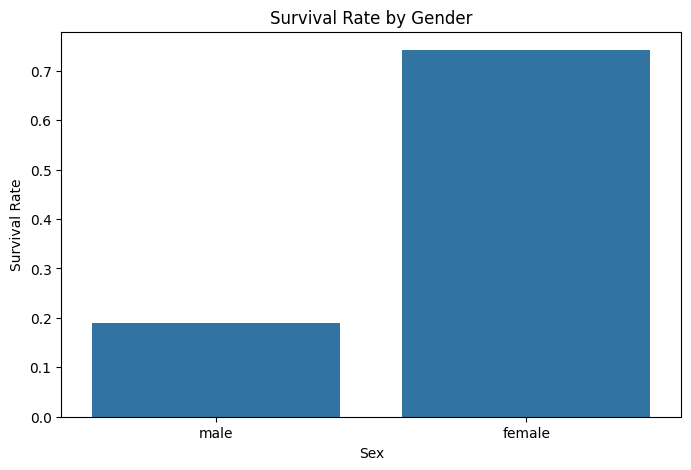

In [4]:
# Calculate survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Rate by Gender:")
print(gender_survival)

# Visualize survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


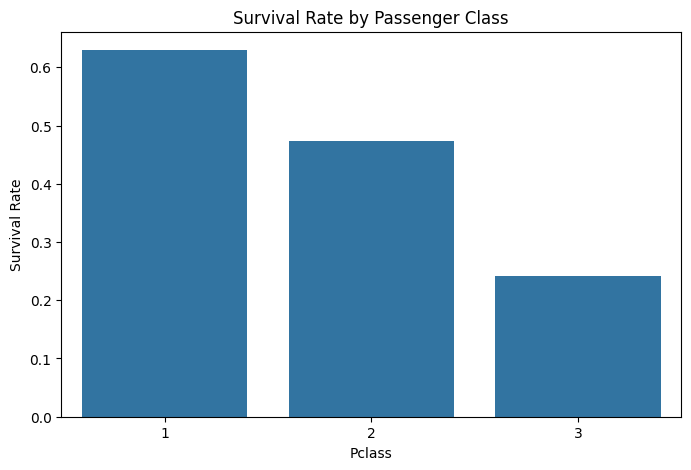

In [5]:
# Calculate survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Passenger Class:")
print(class_survival)

# Visualize survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Age Group:
AgeGroup
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64


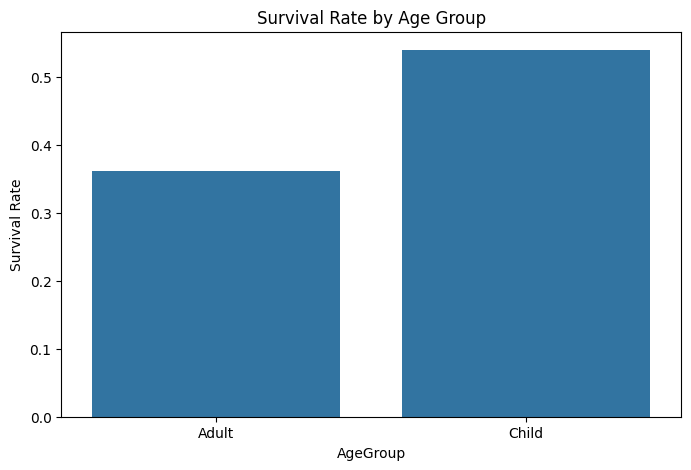

In [6]:
# Define children as passengers under 18 years old
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rate by age group
age_survival = df.groupby('AgeGroup', observed=True)['Survived'].mean() * 100
print("Survival Rate by Age Group:")
print(age_survival)

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')


# Display the plot 
plt.show()

Survival Rate by Embarkation Point:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


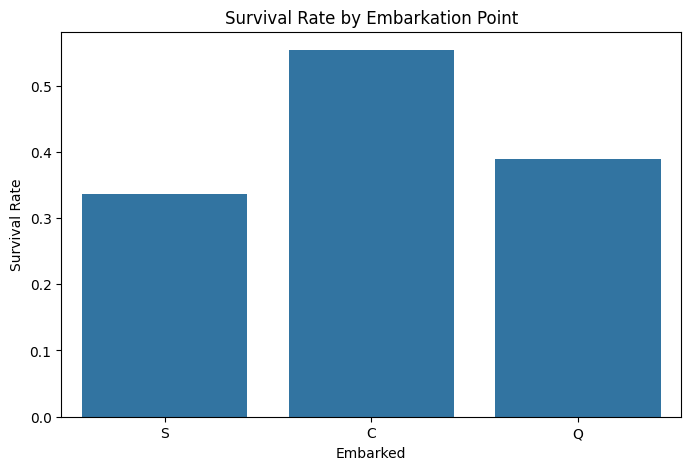

In [7]:
# Calculate survival rate by embarkation point
embarkation_survival = df.groupby('Embarked')['Survived'].mean() * 100
print("Survival Rate by Embarkation Point:")
print(embarkation_survival)

# Visualize survival rate by embarkation point
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Fare Category:
FareCategory
Low       32.402235
Medium    65.420561
High      73.584906
Name: Survived, dtype: float64


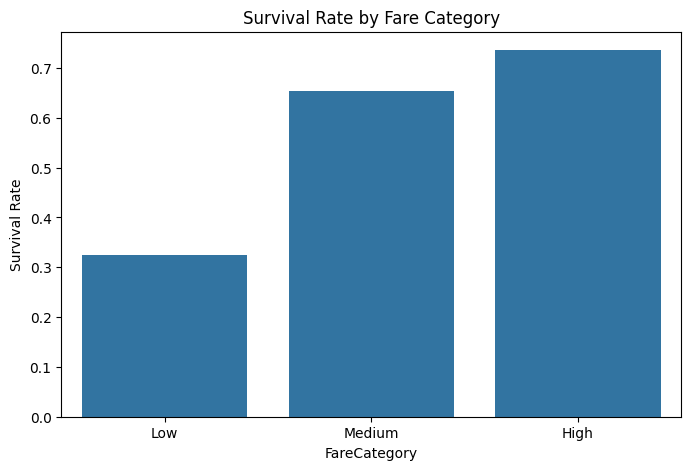

In [8]:
# Categorize fares into bins (Low, Medium, High)
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 50, 100, 600], labels=['Low', 'Medium', 'High'])

# Calculate survival rate by fare category
fare_survival = df.groupby('FareCategory', observed=True)['Survived'].mean() * 100
print("Survival Rate by Fare Category:")
print(fare_survival)

# Visualize survival rate by fare category
plt.figure(figsize=(8, 5))
sns.barplot(x='FareCategory', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Fare Category')
plt.ylabel('Survival Rate')
plt.show()

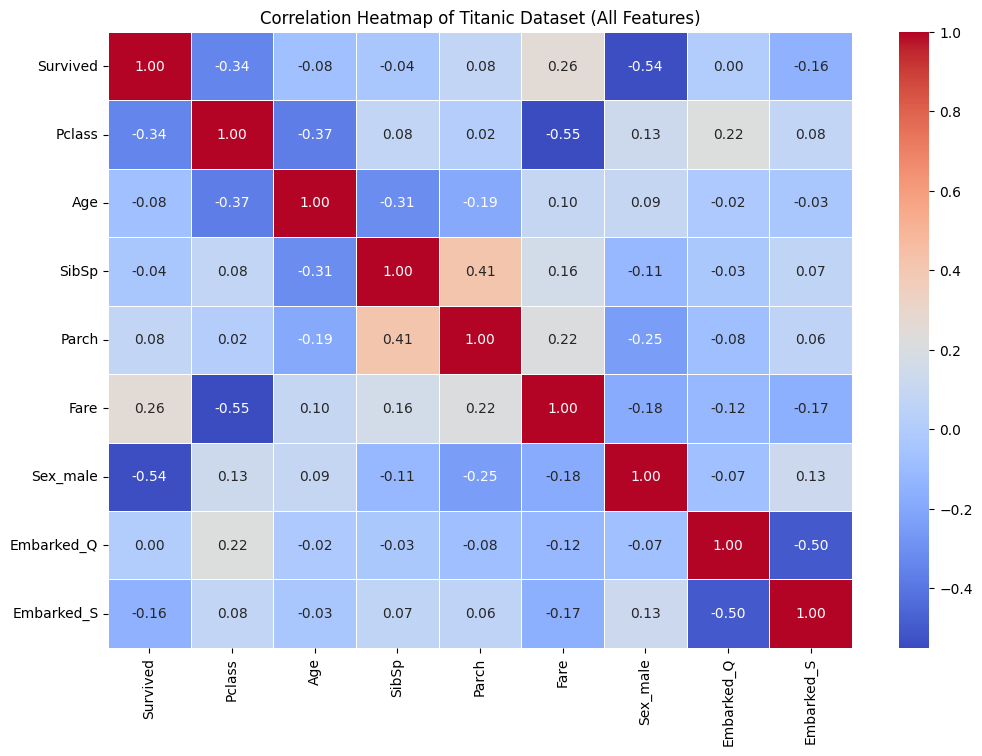

In [11]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Select relevant features for correlation analysis
relevant_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
correlation_matrix = df_encoded[relevant_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset (All Features)')
plt.savefig('correlation_heatmap_all_features.png', bbox_inches='tight')  # Save the heatmap
plt.show()